# SSA C Multisolver (KS Solver)

## Purpose:
#### The SSA C Multisolver is a wrapper for the C-based SSA solver.  The function of this solver is to run several instances of the C SSA solver concurrently until a point of convergence is reached.

## Details:
#### This convergence is determined by a kolmogorov-smirnov test which is calculated every 100 trajectories.  Once the system reaches it's desired alpha level, it will return the results of all trajectories to the user and display the total number of runs required to reach that convergence.

***
#### Basic Imports

In [1]:
import sys
import os


In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python36.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\GillesPy2']


In [3]:
sys.path


['',
 'C:\\Users\\seanm\\Anaconda3\\python36.zip',
 'C:\\Users\\seanm\\Anaconda3\\DLLs',
 'C:\\Users\\seanm\\Anaconda3\\lib',
 'C:\\Users\\seanm\\Anaconda3',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\seanm\\.ipython',
 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\GillesPy2']

In [4]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


***
### Creating Example Model

In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

Unable to use Cython optimized SSA:
Error:Building module gillespy2.cython_ssa_solver failed: ['distutils.errors.DistutilsPlatformError: Unable to find vcvarsall.bat\n']


In [6]:
model = MichaelisMenten()


In [7]:
from gillespy2.ssa_c_multisolver import SSACMultiSolver

***
# Standard Running Process:

### The solver can be called in-line with model.run(solver=SSACMultiSolver) which will run with default values.

### List of Keyword Arguments:
- model: the model associated with the solver
- output_directory: specified directory for compiling c files
- delete_directory: specifies whether or not to delete directory after run
- number_of_processes: how many process thread to be used for running simulations
- alpha: desired ks-distance to be considered "converged"

### Defaults:
- model=None
- output_directory=None
- delete_directory=True
- number_of_processes=4
- alpha=0.01

In [8]:
results = model.run(solver = SSACMultiSolver, show_labels=False)

TOTAL Runs: 69400


### The Solver can also be customized by instantiating it separately

In [9]:
solver1 = SSACMultiSolver(model=model, alpha=.1, number_of_processes=64)
results = model.run(solver=solver1)

TOTAL Runs: 1100


 ### or in-line

In [10]:
results = model.run(solver=SSACMultiSolver(model=model, alpha=.05), show_labels=False)

TOTAL Runs: 3200


***
# Results:

### Results are formatted as a 3 dimensional array: __results__<font color=red>[trajectory]<font color=green>[timestamp]<font color=blue>[species]

In [11]:
print(results)

[[[  0.       301.       120.         0.         0.      ]
  [  1.010101 262.        84.        36.         3.      ]
  [  2.020202 241.        65.        55.         5.      ]
  ...
  [ 97.979798  29.       116.         4.       268.      ]
  [ 98.989899  26.       114.         6.       269.      ]
  [100.        26.       114.         6.       269.      ]]

 [[  0.       301.       120.         0.         0.      ]
  [  1.010101 269.        91.        29.         3.      ]
  [  2.020202 253.        76.        44.         4.      ]
  ...
  [ 97.979798  40.       107.        13.       248.      ]
  [ 98.989899  36.       103.        17.       248.      ]
  [100.        35.       103.        17.       249.      ]]

 [[  0.       301.       120.         0.         0.      ]
  [  1.010101 267.        90.        30.         4.      ]
  [  2.020202 256.        80.        40.         5.      ]
  ...
  [ 97.979798  30.       110.        10.       261.      ]
  [ 98.989899  32.       112.     

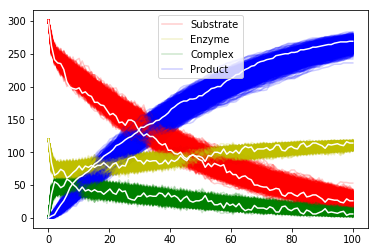

In [12]:
for i in range (len(results)):
    plt.plot(results[0][:,0],results[i][:,1],'-r', alpha=0.2, label='Substrate')
    plt.plot(results[0][:,0],results[i][:,2],'-y', alpha=0.2, label='Enzyme')
    plt.plot(results[0][:,0],results[i][:,3],'-g', alpha=0.2, label='Complex')
    plt.plot(results[0][:,0],results[i][:,4],'-b', alpha=0.2, label='Product')
    if i==0:
        plt.legend(loc='best')
plt.plot(results[0][:,0],results[0][:,1],'-w')
plt.plot(results[0][:,0],results[0][:,2],'-w')
plt.plot(results[0][:,0],results[0][:,3],'-w')
plt.plot(results[0][:,0],results[0][:,4],'-w')

(array([111., 425., 720., 850., 629., 310., 107.,  24.,   3.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
        115, 120, 125, 130, 135, 140, 145]),
 <a list of 19 Patch objects>)

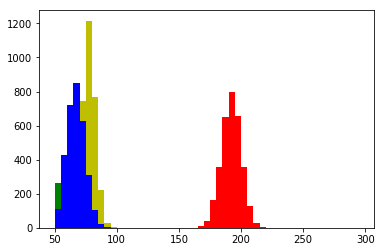

In [13]:
plt.hist(results[:,:][:,15][:,1], color='r', bins=(range(50, 300, 5)))
plt.hist(results[:,:][:,15][:,2], color='y', bins=(range(50, 150, 5)))
plt.hist(results[:,:][:,15][:,3], color='g', bins=(range(50, 150, 5)))
plt.hist(results[:,:][:,15][:,4], color='b', bins=(range(50, 150, 5)))

***
# DETAILS: